In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly
import plotly.graph_objects as go

# Objectives
YWBAT
* explain how a decision tree is trained
* explain information gain and entropy
* reduce overfitting in a dt by tuning hyperparameters


# Decision Trees

Pros 
- categorical and continuous data are treated pretty similarly



Cons
- prone to overfit because it will hunt down each point


# Parts of a DT
* Root Node
    * First Node
    * Highest Information Gain
        * The Feature that best splits our data by target
    * Train Test Split can effect the root node
* Nodes
    * Other Features that best split the data that they see
* Leaf Node
    * Nodes where points are labeled


## algorithm
* calculate information gain for each feature
* choose feature with highest ig as your node
* split data on node
* repeats that same process but only with the data in that node


![](https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png)

In [3]:
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df_train, df_test = train_test_split(df, test_size=0.20)

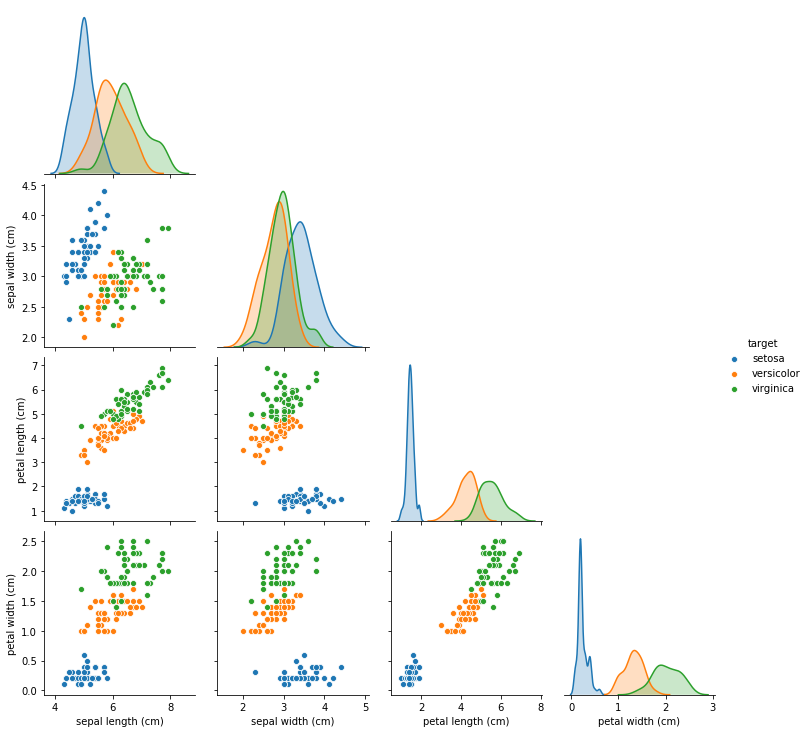

In [9]:
sns.pairplot(df, hue='target', corner=True)
plt.show()

In [5]:
df.target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
X = df.drop(columns=['target'])
y = df[['target']]

In [27]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.15)

In [28]:
clf = DecisionTreeClassifier()

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

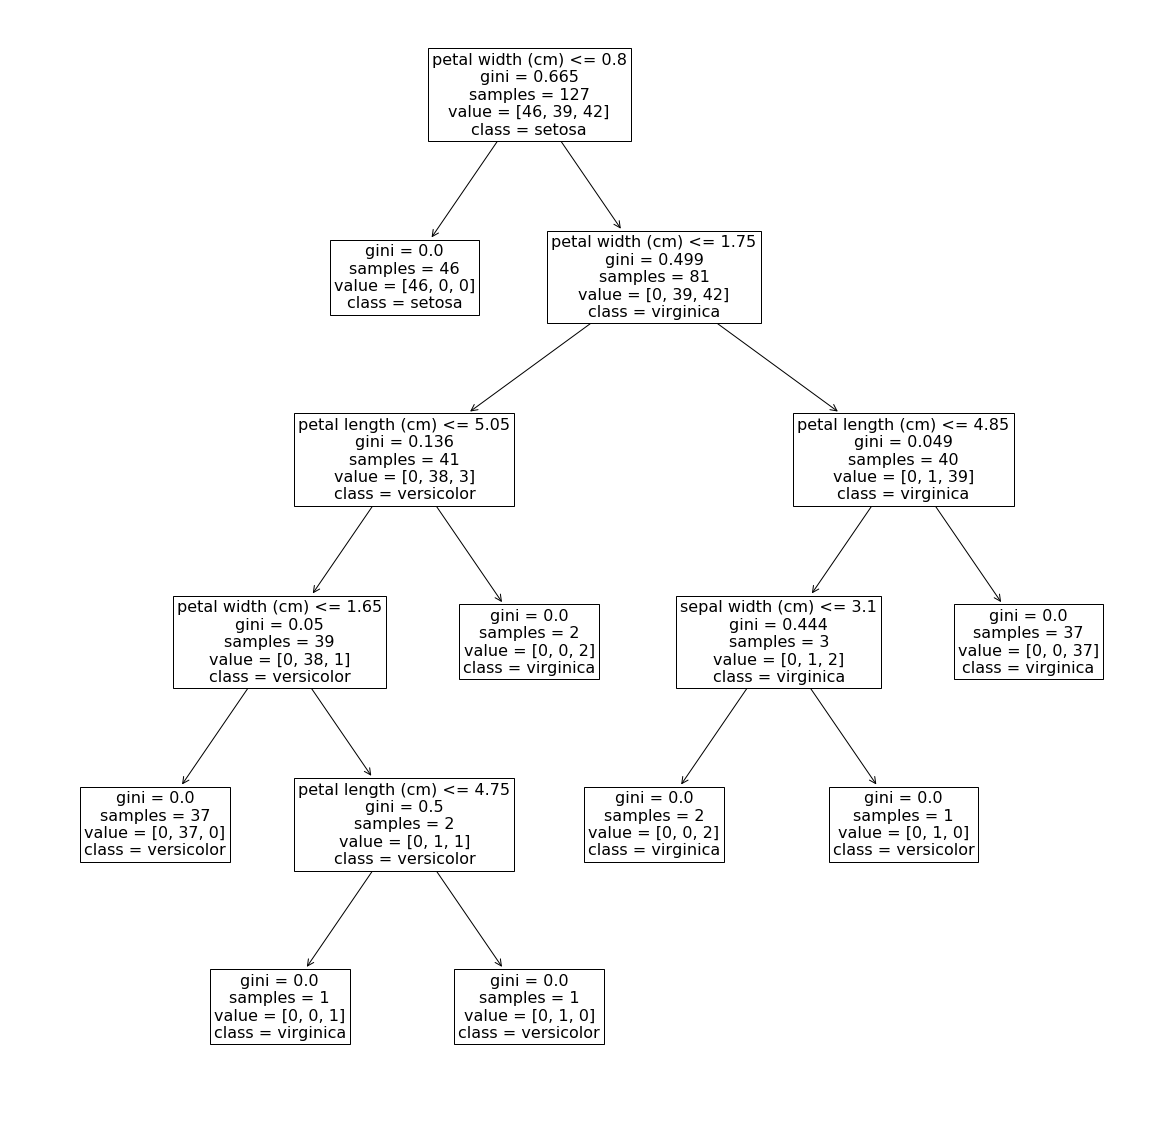

In [30]:
def plot_tree_but_better(clf):
    plt.figure(figsize=(20, 20))
    plot_tree(clf, feature_names=X.columns, class_names=df.target.unique(), fontsize=16)
    plt.show()
    pass

plot_tree_but_better(clf)

## Pruning a DT
- reduce overfitting
- less max_depth
    - restrict number of branchings
- min sample leaf size
    - stop splitting when numbers get small
- max features

In [56]:
# reduce min sample leaf

clf = DecisionTreeClassifier(min_samples_leaf=15)

In [57]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

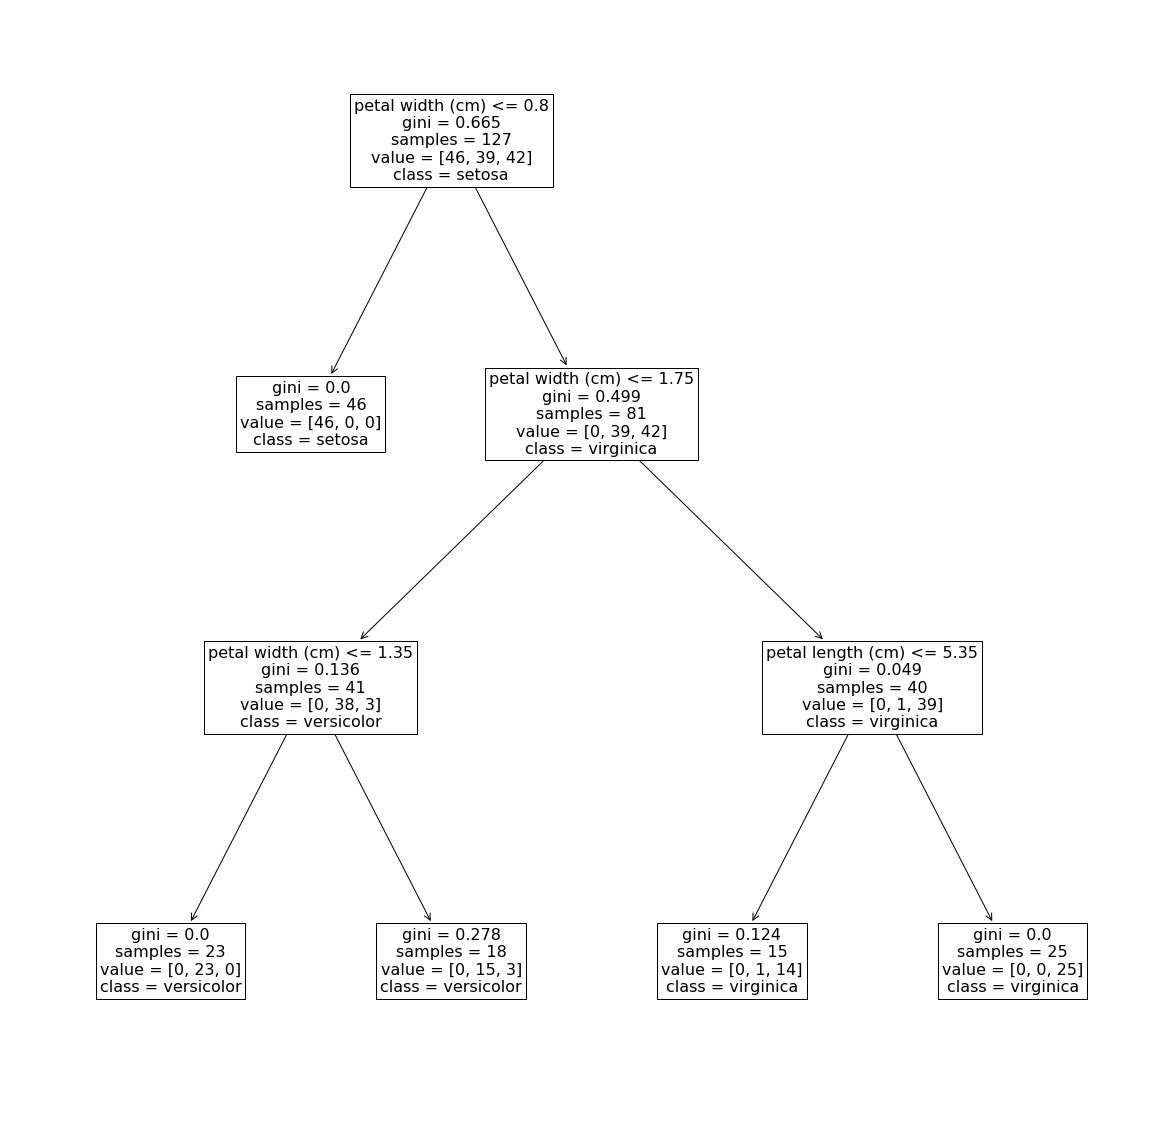

In [58]:
plot_tree_but_better(clf)

In [59]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.968503937007874, 0.9130434782608695)

In [54]:
# reduce depth
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

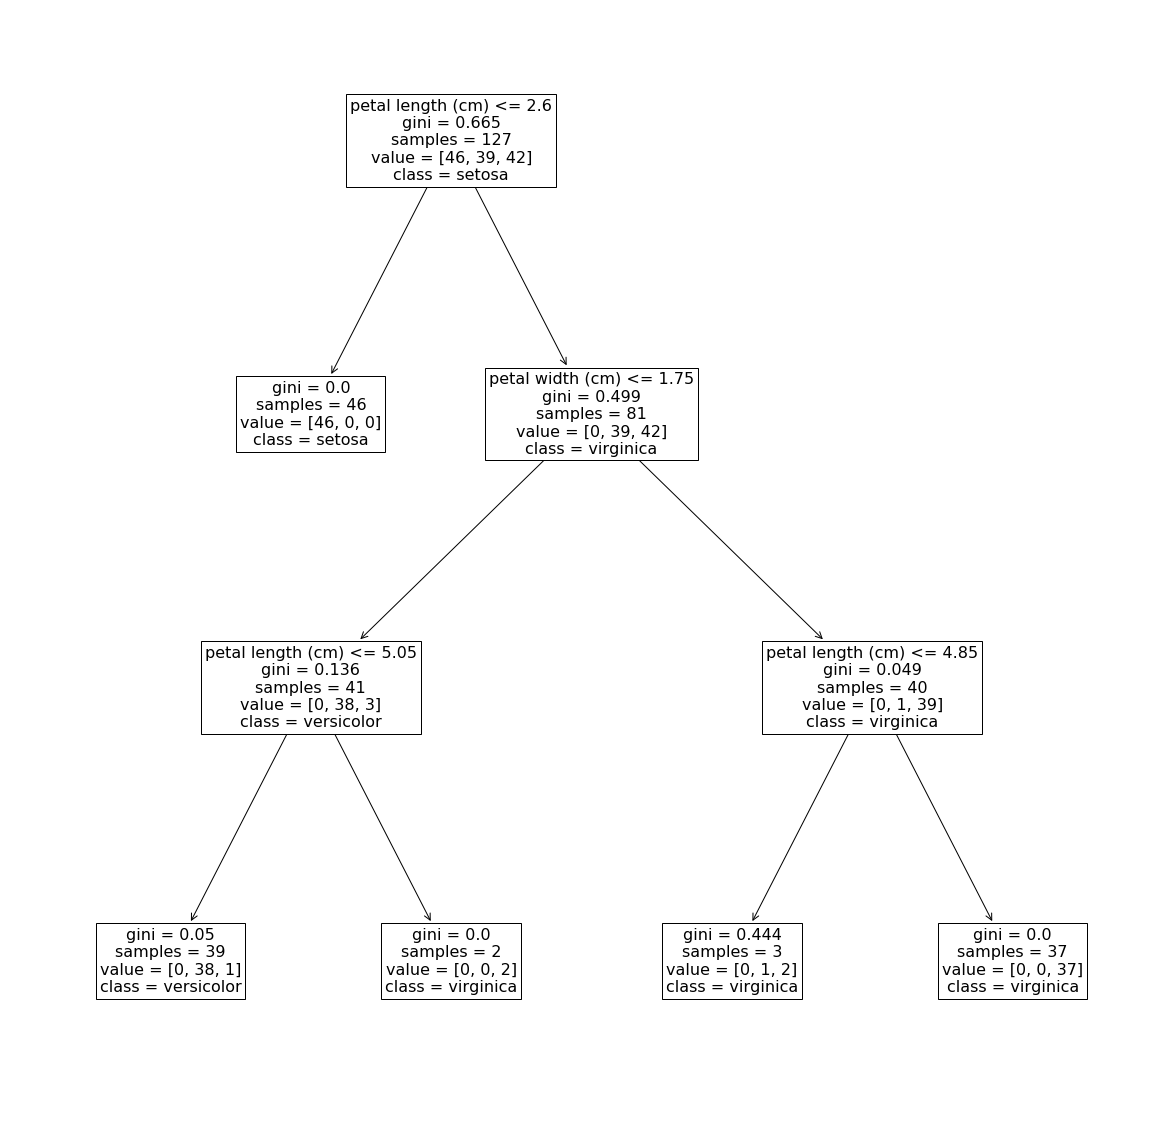

In [55]:
plot_tree_but_better(clf)

In [44]:
# hyperparameter tuning is your best friend
clf = DecisionTreeClassifier()

In [45]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_leaf": [0.10, 0.50, 1]
}

In [47]:
# n_jobs is used for parallelization
gs_clf = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=2)

In [48]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                      

In [49]:
gs_clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
best_dt = gs_clf.best_estimator_

In [51]:
best_dt.score(X_test, y_test)

0.9130434782608695

In [52]:
best_dt.score(X_train, y_train)

0.984251968503937

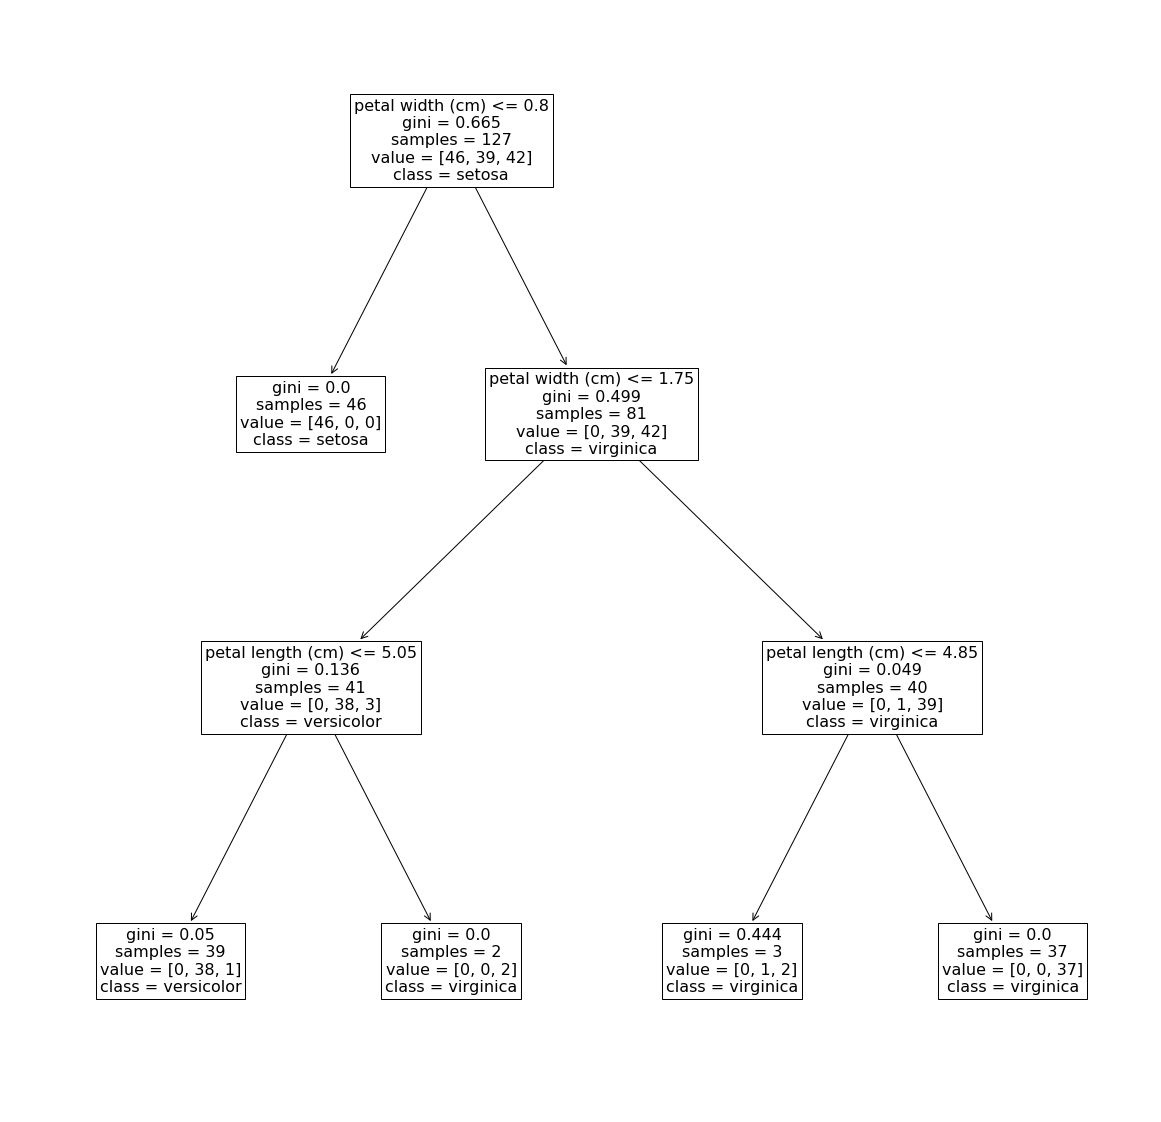

In [53]:
plot_tree_but_better(best_dt)

# What did you learn? 
* pruning = hyperparamter tuning
    * max depth adjustment
    * min samples leaf
    * max features
* what a stump is
* data doesn't need to meet assumptions for a DT
* train score > test score → overfitting
* garbage in = garbage out
* feature engineering should find/maximize points of separation
* root node may change based on train/test split
* fixing figsize for DT plots is crucial
* overfitting is easy on DTs
* pruning limits overdetermination of the model 
